# EXERCISE: end-2-end (small) project -> CLASSIFICATION (easy)

## The Hello World of ML: the IRIS flowers DB

One of the best small project to start with is a well known and widely used database and related ML problem: ***the classification of iris flowers***. This is a good dataset for your first project because:

* Attributes are **numeric** so you do not have to figure out how to load and handle data
* It is a **classification** problem, allowing you to practice with a known type of supervised learning algorithm
* It is a **multiclass classification** problem (multi-nominal) that may require some specialized handling
* It only has 4 attributes and 150 rows, meaning it is **small** and easily fits into memory (good, so it will be fast) as well as on a screen or a single sheet of paper (good, so it will be easy to look at)
* All of the numeric attributes are in the **same units** and the **same scale**, thus not requiring any special scaling or transforms to get started

In this tutorial we are going to treat this as a small ML project, and we will cover:

1. Loading the dataset
2. Summarizing the dataset
3. Visualizing the dataset
4. Evaluating some algorithms
5. Making some predictions

Take your time and work through each step. 

# Loading the dataset

In [1]:
# Load libraries
from pandas import read_csv
#from pandas.plotting import scatter_matrix
from pandas import scatter_matrix
#
from matplotlib import pyplot
#
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
!ls -l iris.data.csv

-rw-r--r--@ 1 bonacor  staff  4551 May 19 20:55 iris.data.csv


In [3]:
# Load dataset
filename =  'iris.data.csv'
names = [ 'sepal-length' ,  'sepal-width' ,  'petal-length' ,  'petal-width' ,  'class' ]
dataset = read_csv(filename, names=names)

# Summarizing the dataset

### Dimensions of the dataset

In [4]:
# shape
print(dataset.shape)

(150, 5)


### Peek at the data itself

In [6]:
# head
#print(dataset.head(20))
dataset.head(10)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### Statistical summary of all attributes

In [7]:
# descriptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


### Breakdown of the data by the class variable

In [8]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# Visualizing the dataset

### Univariate plots

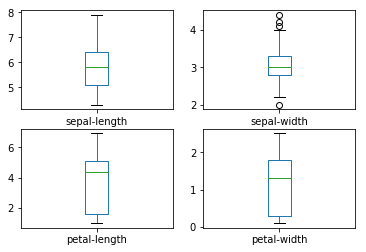

In [9]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.rcParams["figure.figsize"] = [10,10]
pyplot.show()

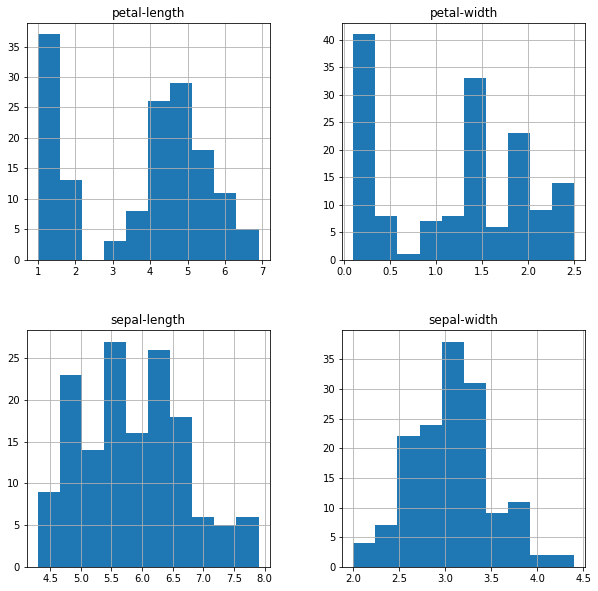

In [10]:
# histograms
dataset.hist()
pyplot.show()

### Multivariate plots

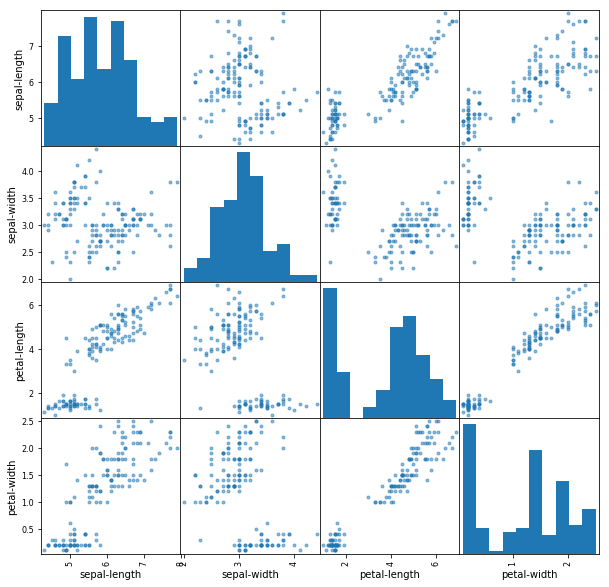

In [11]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

# Evaluating some algorithms

### Create a validation dataset

In [12]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
    test_size=validation_size, random_state=seed)

### Test Harness

### Build Models

* Logistic Regression (LR)
* Linear Discriminant Analysis (LDA)
* k-Nearest Neighbors (KNN)
* Classification and Regression Trees (CART)
* Gaussian Naive Bayes (NB)

In [13]:
# Spot-Check Algorithms
models = []
models.append(( 'LR' , LogisticRegression()))
models.append(( 'LDA' , LinearDiscriminantAnalysis()))
models.append(( 'KNN' , KNeighborsClassifier()))
models.append(( 'CART' , DecisionTreeClassifier()))
models.append(( 'NB' , GaussianNB()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=10, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.966667 (0.040825)
NB: 0.975000 (0.053359)


### Select The Best Model

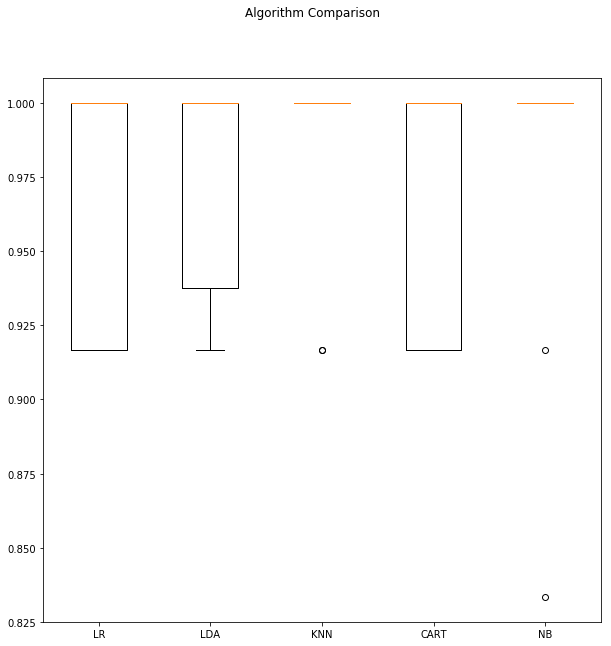

In [14]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Making some predictions

In [15]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30



We can see that the accuracy is 0.9 or 90%. The confusion matrix provides an indication of the three errors made. Finally the classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results (granted the validation dataset
was small).

## Summary

What we did:

* we discovered step-by-step how to complete a first ML project in Python. We discovered that completing a small end-to-end project from loading the data to making predictions is the best way to get familiar with the platform.